In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline

# Data Exploration

In [2]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
data = pd.read_csv("Input/tweets.csv", encoding='ISO-8859-1')
data.columns = DATASET_COLUMNS

In [15]:
data0 = pd.DataFrame()
data0 = data.loc[data['target']==0]
data0.shape

(799999, 6)

In [24]:
data1 = pd.DataFrame()
data1 = data.loc[data['target']==4]
data1.head()

,target,ids,date,flag,user,text
799999,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800000,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800001,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800002,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800003,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [25]:
data0 = data0.loc[0:749]
data1 = data1.loc[799999:800748]
data0.shape
data1.shape

(751, 6)

In [26]:
data = pd.concat([data0,data1],axis=0)

In [28]:
data.shape

(1501, 6)

In [29]:
data.tail(3)

,target,ids,date,flag,user,text
800747,4,1467954085,Mon Apr 06 22:58:42 PDT 2009,NO_QUERY,rachelw627,@JonathanRKnight or are you a Mac? then you c...
800748,4,1467954088,Mon Apr 06 22:58:42 PDT 2009,NO_QUERY,parvathiom,@rashmid congratulations!! tht makes a lot of ...
800749,4,1467954149,Mon Apr 06 22:58:43 PDT 2009,NO_QUERY,vivalavia,@colorofviolence yay i'm happy for you guys.....


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1501 entries, 0 to 800749
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  1501 non-null   int64 
 1   ids     1501 non-null   int64 
 2   date    1501 non-null   object
 3   flag    1501 non-null   object
 4   user    1501 non-null   object
 5   text    1501 non-null   object
dtypes: int64(2), object(4)
memory usage: 82.1+ KB


In [31]:
data.loc[13, "text"]

"@smarrison i would've been the first, but i didn't have a gun.    not really though, zac snyder's just a doucheclown."

In [32]:
data.loc[13, "target"]

0

### Bar plot of 'Sentiment'

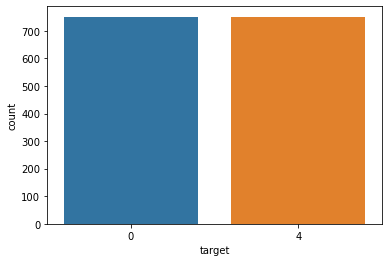

In [42]:
sns.countplot(x="target", data=data)
plt.show()

In [43]:
data["target"].value_counts()

4    751
0    750
Name: target, dtype: int64

In [ ]:
468/(1032+468)

### Find the length of each 'review'

In [44]:
data["len"] = data["text"].apply(len)

In [45]:
data["len"].describe()

count    1501.000000
mean       75.815456
std        36.765816
min         8.000000
25%        46.000000
50%        71.000000
75%       105.000000
max       152.000000
Name: len, dtype: float64

### Plot the histogram of 'len'

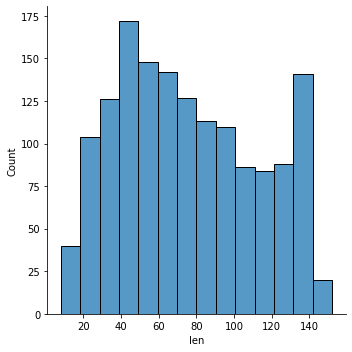

In [46]:
sns.displot(data["len"])
plt.show()

### Plot the distribution of 'len' for different 'Sentiment' types

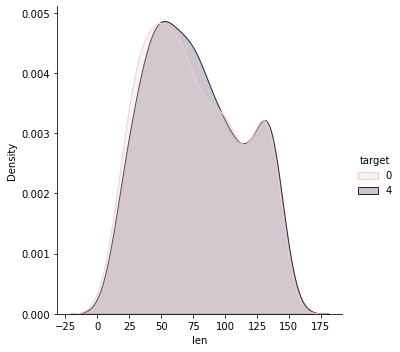

In [47]:
sns.displot(data=data, x="len", hue="target", kind="kde", fill=True)
plt.show()

# Tokenization

In [48]:
data = data[["text", "target"]]

In [49]:
data.loc[13, "text"]

"@smarrison i would've been the first, but i didn't have a gun.    not really though, zac snyder's just a doucheclown."

In [50]:
sent_tokenize(data.loc[13,"text"])

["@smarrison i would've been the first, but i didn't have a gun.",
 "not really though, zac snyder's just a doucheclown."]

In [52]:
word_tokenize(data.loc[13, "text"])

['@',
 'smarrison',
 'i',
 'would',
 "'ve",
 'been',
 'the',
 'first',
 ',',
 'but',
 'i',
 'did',
 "n't",
 'have',
 'a',
 'gun',
 '.',
 'not',
 'really',
 'though',
 ',',
 'zac',
 'snyder',
 "'s",
 'just',
 'a',
 'doucheclown',
 '.']

### Convert text to lower case

In [54]:
reviews = list(data["text"])

In [55]:
len(reviews)

1501

In [56]:
reviews[13]

"@smarrison i would've been the first, but i didn't have a gun.    not really though, zac snyder's just a doucheclown."

In [57]:
reviews_lower = [r.lower() for r in reviews]

In [58]:
reviews_lower[13]

"@smarrison i would've been the first, but i didn't have a gun.    not really though, zac snyder's just a doucheclown."

In [59]:
reviews_lower = []
for r in reviews:
    reviews_lower.append(r.lower())

In [60]:
tokens = [word_tokenize(r) for r in reviews_lower]

In [61]:
tokens[13]

['@',
 'smarrison',
 'i',
 'would',
 "'ve",
 'been',
 'the',
 'first',
 ',',
 'but',
 'i',
 'did',
 "n't",
 'have',
 'a',
 'gun',
 '.',
 'not',
 'really',
 'though',
 ',',
 'zac',
 'snyder',
 "'s",
 'just',
 'a',
 'doucheclown',
 '.']

In [62]:
len(tokens)

1501

# Stopwords removal

In [63]:
sw = stopwords.words('english')

In [64]:
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [65]:
tokens = [[word for word in t if word not in sw] for t in tokens]

In [66]:
tokens[13]

['@',
 'smarrison',
 'would',
 "'ve",
 'first',
 ',',
 "n't",
 'gun',
 '.',
 'really',
 'though',
 ',',
 'zac',
 'snyder',
 "'s",
 'doucheclown',
 '.']

In [67]:
reviews[13]

"@smarrison i would've been the first, but i didn't have a gun.    not really though, zac snyder's just a doucheclown."

### Remove punctuations

In [68]:
tokenizer = RegexpTokenizer(r'\w+')

In [69]:
tokenizer.tokenize("wasn't")

['wasn', 't']

In [70]:
t = tokenizer.tokenize("wasn't")

In [71]:
"".join(t)

'wasnt'

In [72]:
tokenizer.tokenize(":")

[]

In [73]:
tokens = [["".join(tokenizer.tokenize(word)) for word in t
           if len(tokenizer.tokenize(word))>0] for t in tokens]

In [74]:
tokens[13]

['smarrison',
 'would',
 've',
 'first',
 'nt',
 'gun',
 'really',
 'though',
 'zac',
 'snyder',
 's',
 'doucheclown']

In [75]:
reviews[13]

"@smarrison i would've been the first, but i didn't have a gun.    not really though, zac snyder's just a doucheclown."

# Stemming

In [76]:
porter = PorterStemmer()
lancaster = LancasterStemmer()

In [77]:
porter.stem("teachers")

'teacher'

In [78]:
lancaster.stem("teachers")

'teach'

In [79]:
porter.stem("absolutely")

'absolut'

In [80]:
lancaster.stem("absolutely")

'absolv'

In [81]:
tokens = [[porter.stem(word) for word in t] for t in tokens]

In [82]:
tokens[13]

['smarrison',
 'would',
 've',
 'first',
 'nt',
 'gun',
 'realli',
 'though',
 'zac',
 'snyder',
 's',
 'doucheclown']

In [83]:
reviews[13]

"@smarrison i would've been the first, but i didn't have a gun.    not really though, zac snyder's just a doucheclown."

# Word count distribution

In [84]:
flat_tokens = [word for t in tokens for word in t]

In [85]:
len(flat_tokens)

12263

In [86]:
flat_tokens[:10]

['upset',
 'ca',
 'nt',
 'updat',
 'facebook',
 'text',
 'might',
 'cri',
 'result',
 'school']

In [87]:
counts = Counter(flat_tokens)

In [88]:
len(counts)

4100

In [89]:
counts.most_common(10)

[('nt', 189),
 ('s', 159),
 ('m', 148),
 ('go', 124),
 ('get', 105),
 ('good', 94),
 ('love', 89),
 ('quot', 88),
 ('day', 83),
 ('time', 78)]

# Bag of Words

In [90]:
tokens[13]

['smarrison',
 'would',
 've',
 'first',
 'nt',
 'gun',
 'realli',
 'though',
 'zac',
 'snyder',
 's',
 'doucheclown']

In [91]:
" ".join(tokens[13])

'smarrison would ve first nt gun realli though zac snyder s doucheclown'

In [92]:
clean_reviews = [" ".join(t) for t in tokens]

In [93]:
clean_reviews[13]

'smarrison would ve first nt gun realli though zac snyder s doucheclown'

In [94]:
vect = CountVectorizer(binary=True, min_df=5)

In [95]:
X = vect.fit_transform(clean_reviews)

In [96]:
X.shape

(1501, 418)

### Unique words in the vocabulary

In [97]:
len(vect.vocabulary_)

418

### Convert the sparse matrix to array

In [98]:
type(X)

scipy.sparse.csr.csr_matrix

In [99]:
X_a = X.toarray()

In [100]:
X_a.shape

(1501, 418)

In [101]:
X_a[13,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [102]:
X_a[13,:].sum()

6

In [103]:
clean_reviews[13]

'smarrison would ve first nt gun realli though zac snyder s doucheclown'

In [105]:
X_a[13,370]

0

In [106]:
vect.get_feature_names().index("work")

405

In [107]:
X_a[13,401]

0

In [108]:
data.head()

,text,target
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0


In [109]:
data["target"] = data["target"].apply(lambda x: 1 if x==4 else 0)

C:\Users\sneha\AppData\Local\Temp/ipykernel_13332/3039991190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["target"] = data["target"].apply(lambda x: 1 if x==4 else 0)


In [110]:
y = data["target"]

### Split the dataset into train and test

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=42)

### Build a Logistic Regression model

In [112]:
model = LogisticRegression()

In [113]:
model.fit(X_train, y_train)

LogisticRegression()

In [114]:
train_pred = model.predict(X_train)

In [115]:
accuracy_score(y_train, train_pred)

0.8216666666666667

In [116]:
test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)

0.6378737541528239

### Save both the vectorizer and the model

In [117]:
with open("Output/binary_count_vect.pkl", "wb") as f:
    pickle.dump(vect, f)
with open("Output/binary_count_vect_lr.pkl", "wb") as f:
    pickle.dump(model, f)

In [118]:
vect = TfidfVectorizer(min_df=5)

In [119]:
X = vect.fit_transform(clean_reviews)

In [120]:
X.shape

(1501, 418)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=42)

In [122]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [123]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print(f"Train Accuracy:{accuracy_score(y_train, train_pred)}")
print(f"Test Accuracy:{accuracy_score(y_test, test_pred)}")

Train Accuracy:0.8016666666666666
Test Accuracy:0.6478405315614618


In [124]:
with open("Output/tf-idf.pkl", "wb") as f:
    pickle.dump(vect, f)
with open("Output/tf-idf_lr.pkl", "wb") as f:
    pickle.dump(model, f)